In [2]:
import pandas as pd
import seaborn as sn

In [3]:
df = pd.read_csv('bhp.csv')

In [4]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [5]:
df['price_per_sqft']

0         3699
1         4615
2         4305
3         6245
4         4250
         ...  
13195     6689
13196    11111
13197     5258
13198    10407
13199     3090
Name: price_per_sqft, Length: 13200, dtype: int64

In [8]:
df['price_per_sqft'].quantile(0.001)

1366.184

In [15]:
df_without_outliners = df[(df['price_per_sqft'] > df['price_per_sqft'].quantile(0.001)) & (df['price_per_sqft'] < df['price_per_sqft'].quantile(0.999))]

In [27]:
df_without_outliners

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
11,Whitefield,4 Bedroom,2785.0,5.0,295.0,4,10592
18,other,3 BHK,2770.0,4.0,290.0,3,10469
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13170,Sarjapur Road,4 BHK,4050.0,2.0,450.0,4,11111
13176,Cox Town,2 BHK,1200.0,2.0,140.0,2,11666
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.0,7,16666
13196,other,4 BHK,3600.0,5.0,400.0,4,11111


<Axes: xlabel='price_per_sqft', ylabel='Count'>

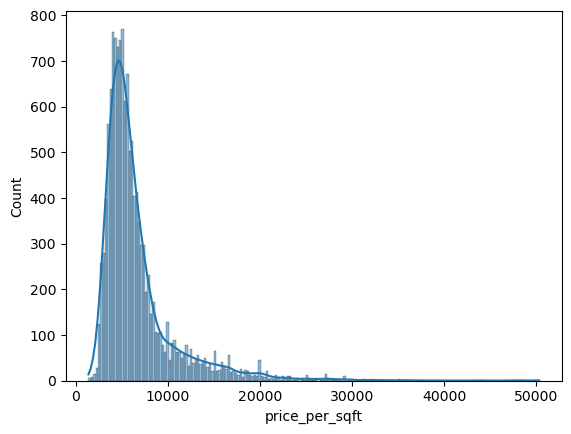

In [16]:
sn.histplot(df_without_outliners['price_per_sqft'], kde = True)

In [17]:
df_without_outliners.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


In [21]:
std_dev = df_without_outliners['price_per_sqft'].std()
mean = df_without_outliners['price_per_sqft'].mean()

In [22]:
mean - 4*std_dev

-9900.429065502549

In [23]:
mean + 4*std_dev

23227.73653589429

In [24]:
df_within_4sigma = df_without_outliners = df[(df['price_per_sqft'] > 9900.429) & (df['price_per_sqft'] < 23227.736)]

In [25]:
df_within_4sigma

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
11,Whitefield,4 Bedroom,2785.0,5.0,295.0,4,10592
18,other,3 BHK,2770.0,4.0,290.0,3,10469
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13170,Sarjapur Road,4 BHK,4050.0,2.0,450.0,4,11111
13176,Cox Town,2 BHK,1200.0,2.0,140.0,2,11666
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.0,7,16666
13196,other,4 BHK,3600.0,5.0,400.0,4,11111


<Axes: xlabel='price_per_sqft', ylabel='Count'>

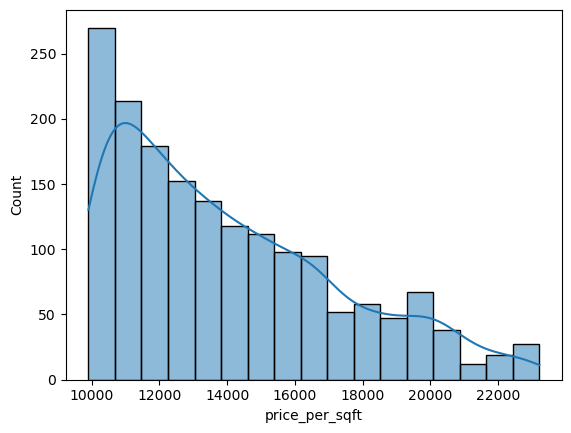

In [26]:
sn.histplot(df_within_4sigma['price_per_sqft'], kde = True)